In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
df = pd.read_csv(
        Path.cwd()/"data"/"asset_value.csv",
        index_col=0,
        parse_dates=True
    )

df["Total"] = df.sum(axis=1)
df

,VOO,006208,00687B,00919,BTC,WBETH,BNB,BCH,Total
2021-04-23,0,0,0,0,502,0,0,0,502
2021-04-24,0,0,0,0,492,0,0,0,492
2021-04-25,0,0,0,0,482,0,0,0,482
2021-04-26,0,0,0,0,1529,0,0,0,1529
2021-04-27,0,0,0,0,1546,0,0,0,1546
...,...,...,...,...,...,...,...,...,...
2025-04-29,177631,163546,131172,21130,109603,23186,62479,53090,741837
2025-04-30,177147,163877,130995,21060,109161,23042,62139,53297,740718
2025-05-01,176803,163877,130995,21060,110807,23405,61606,52083,740636
2025-05-02,179783,172074,126609,21330,111082,23463,61759,52213,748313


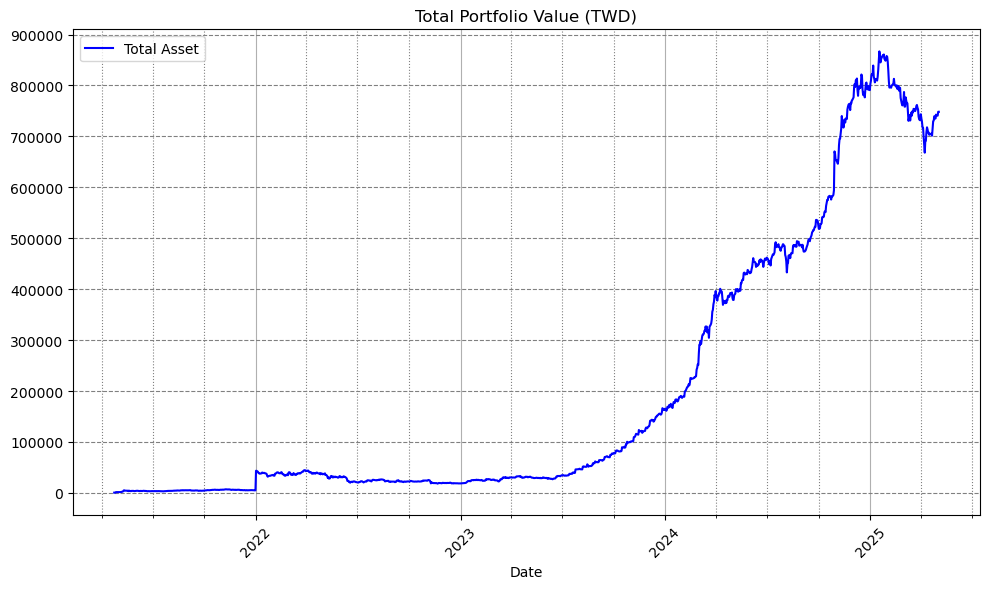

In [13]:
# 畫總資產圖
plt.figure(figsize=(10,6))
plt.plot(df.index, df["Total"], label="Total Asset", color="blue")
plt.title("Total Portfolio Value (TWD)")
plt.xlabel("Date")
plt.legend()
plt.grid(which='both', axis='x')

ax = plt.gca()
# 每年標一次
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 每季標一次格線
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))

# 顯示次刻度格線
ax.grid(which='minor', axis='x', linestyle=':', color='gray')

# Y軸每100000元一條格線
ax.yaxis.set_major_locator(plt.MultipleLocator(100000))
ax.grid(which='major', axis='y', linestyle='--', color='gray')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

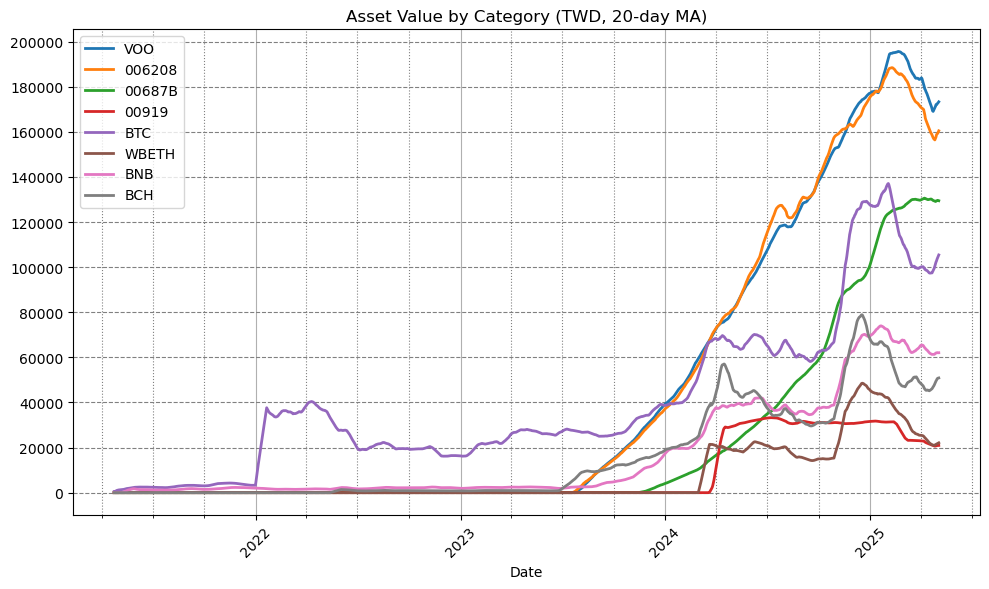

In [21]:
# 畫各資產價值變化圖（平滑化）
plt.figure(figsize=(10,6))
asset_cols = [col for col in df.columns if col != "Total"]
colors = plt.cm.tab10.colors  # 最多10種顏色

for i, col in enumerate(asset_cols):
    smooth = df[col].rolling(window=20, min_periods=1).mean()  # 20天移動平均
    plt.plot(
        df.index, smooth,
        label=col,
        color=colors[i % len(colors)],
        linewidth=2
    )

plt.title("Asset Value by Category (TWD, 20-day MA)")
plt.xlabel("Date")
plt.legend()
plt.grid(which='both', axis='x')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.grid(which='minor', axis='x', linestyle=':', color='gray')
ax.yaxis.set_major_locator(plt.MultipleLocator(20000))
ax.grid(which='major', axis='y', linestyle='--', color='gray')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()